In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict, Tuple

import plot_settings
import plot_utils

from importlib import reload

In [2]:
results = pd.read_csv("../political_compass_results.csv")
results = results[results.prompt_name.isin(["Donald Trump", "Hillary Clinton", "Gary Johnson", "Jill Stein"])]
results.head()

,Unnamed: 0,model,prompt_name,average_economic_score,average_social_score,forward_economic_score,forward_social_score,reverse_economic_score,reverse_social_score
3,3,gpt2,Donald Trump,0.315,0.565,0.50,-3.08,0.13,4.21
4,4,gpt2,Hillary Clinton,1.125,-0.025,0.75,-3.13,1.50,3.08
5,5,gpt2,Gary Johnson,0.940,0.230,0.75,-3.54,1.13,4.00
6,6,gpt2,Jill Stein,0.940,0.410,0.38,-2.82,1.50,3.64
15,15,bert-base-uncased,Donald Trump,0.625,0.360,3.38,0.62,-2.13,0.10


In [3]:
gt_res = pd.read_csv("../political_compass_gold_standard_labels.csv")
gt_res = gt_res.rename(columns={"economic_score": "average_economic_score", "social_score": "average_social_score"})
gt_res.head()

,persona,average_economic_score,average_social_score
0,Hillary Clinton,7.5,5.0
1,Donald Trump,6.5,9.0
2,Gary Johnson,9.4,-1.5
3,Jill Stein,-2.4,-2.5
4,Green Party,-3.0,-2.9


In [4]:
result_rows = {
    m: [
        results[(results.model == m) & (results.prompt_name == cand)] for cand in ["Donald Trump", "Hillary Clinton", "Gary Johnson", "Jill Stein"]
    ] for m in plot_settings.MODELS if m != "gold_standard"
}
result_rows["gold_standard"] = [gt_res[gt_res.persona == cand] for cand in ["Donald Trump", "Hillary Clinton", "Gary Johnson", "Jill Stein"]]

// 0
o 1
- 2
x 3


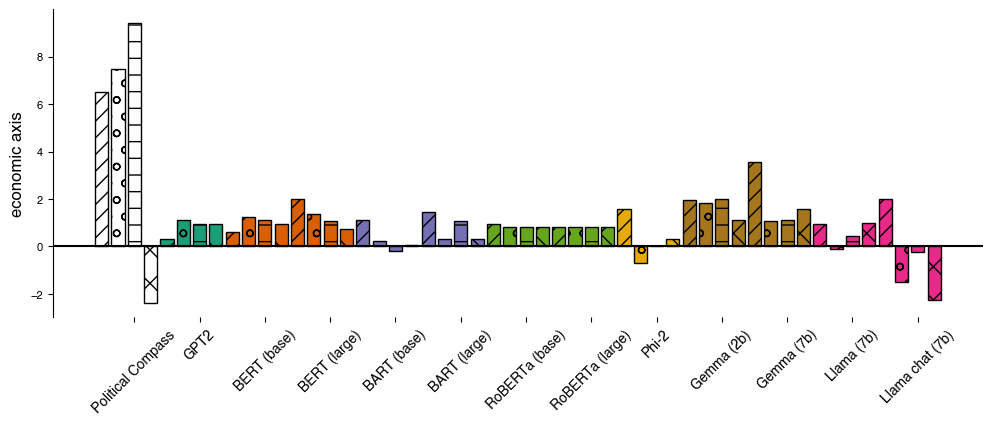

In [5]:
%matplotlib inline

# reload(plot_utils), reload(plot_settings)

ax = plot_utils.make_alternating_vertical_barplot(
    {m: [r.average_economic_score.iloc[0] for r in result_rows[m]] for m in result_rows},
    textures=["//", "o", "-", "x"], metric="economic_score", double=True
)
plt.show()

// 0
o 1
- 2
x 3


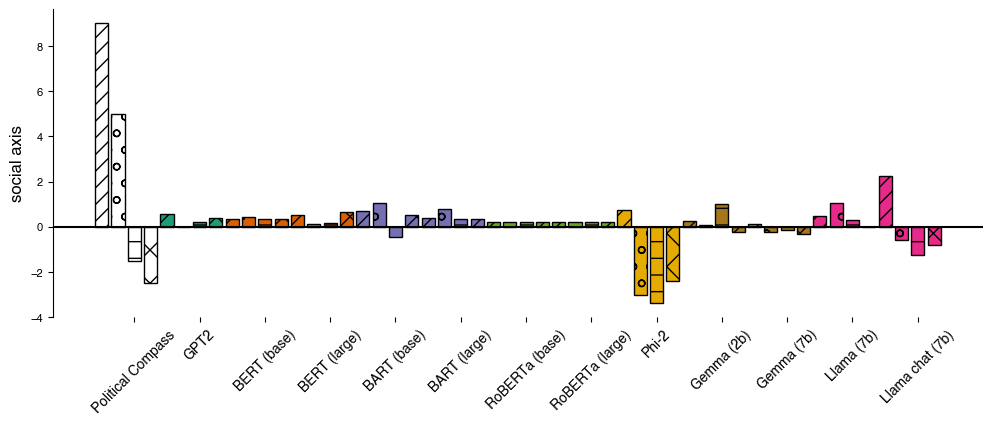

In [8]:
%matplotlib inline

# reload(plot_utils)

ax = plot_utils.make_alternating_vertical_barplot(
    {m: [r.average_social_score.iloc[0] for r in result_rows[m]] for m in result_rows},
    textures=["//", "o", "-", "x"], metric="social_score", double=True
)
plt.show()